In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('datasets/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# rename the unnammed 
df.rename(columns={'Unnamed: 0':'Number'}, inplace=True)
df.head()

,Number,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# set index as the first raw
df.set_index('Number', inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


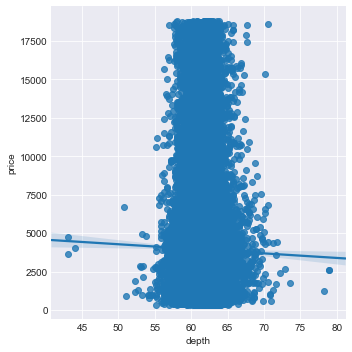

In [5]:
# Make a scatter plot
sns.lmplot(x='depth', y='price', data=df)

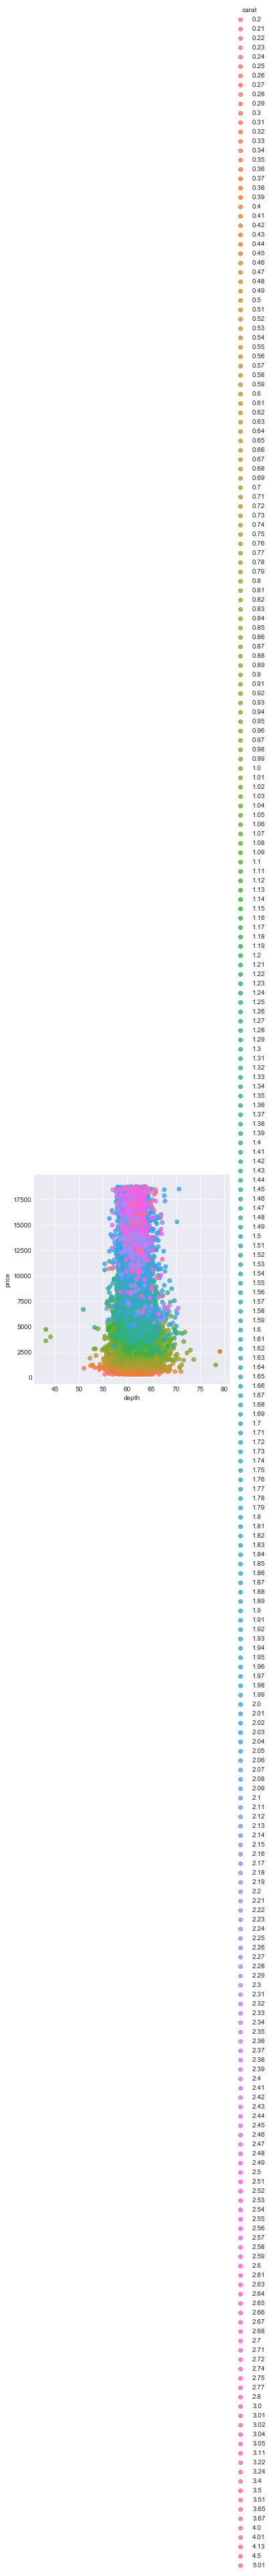

In [6]:
sns.lmplot(x='depth', y='price', data=df,
           fit_reg=False,
           hue='carat')

In [7]:
# defining a bins
bins = [0.2,1.0,2.0,3.0,4.0,5.0,6.0]
# creating a group 
names = ['A','B','C','D','E','F']
df['newvalues'] = pd.cut(df['carat'],bins,labels=names)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,newvalues
Number,,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,A
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,A
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,A
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,A
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,A


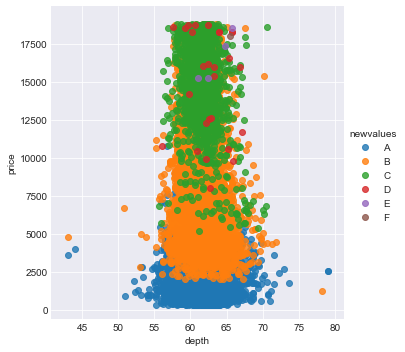

In [8]:
# ploting agian
sns.lmplot(x='depth',y='price',data=df,
          fit_reg = False,
          hue = 'newvalues')

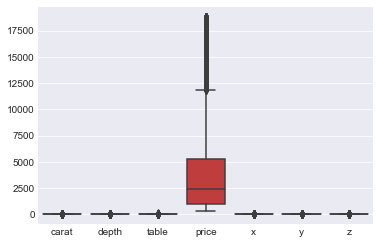

In [9]:
sns.boxplot(data=df)

In [10]:
# droping a price column 
new_table = df.drop(['price'], axis=1)
new_table.head()

,carat,cut,color,clarity,depth,table,x,y,z,newvalues
Number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,A
2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,A
3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,A
4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,A
5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,A


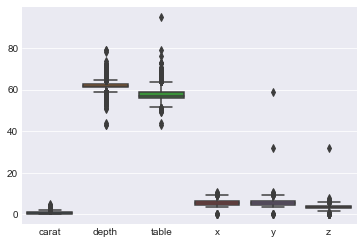

In [11]:
sns.boxplot(data=new_table)

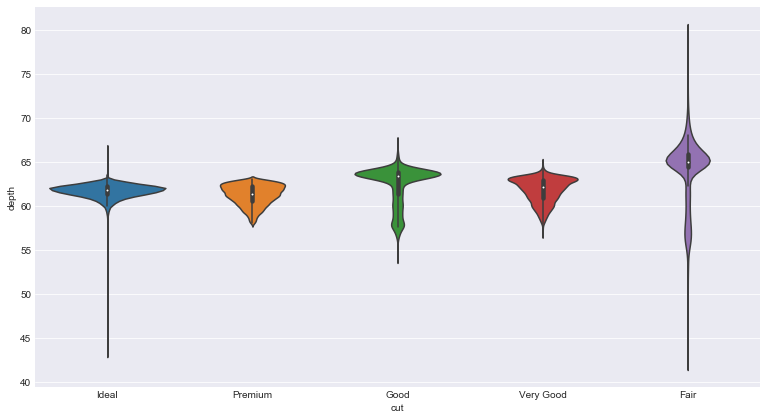

In [12]:
# changing plot size
plt.subplots(figsize=(13,7))
# violen plot shows 
sns.violinplot(x='cut',y='depth', data=df)

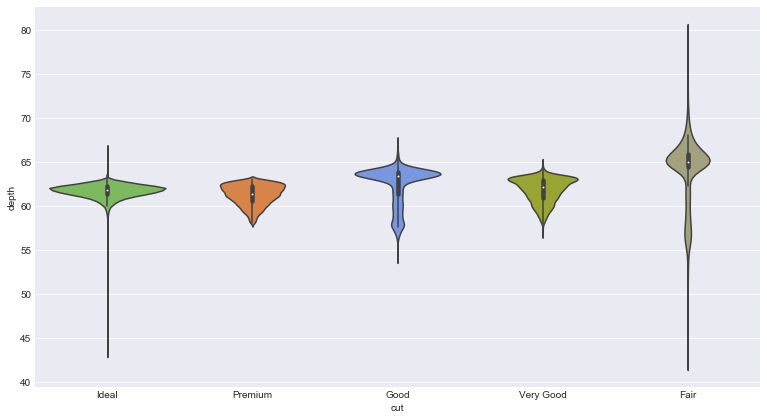

In [13]:
# Dfine colors 
colors = ['#78C850', # Grass
          '#F08030', # Fire
          '#6890F0', # Water 
          '#A8B820', # Bug
          '#A8A878', # Normal Dragon
         ]
# violin plot with color list 
plt.subplots(figsize=(13,7))
sns.violinplot(x='cut', y='depth', data=df, palette=colors)

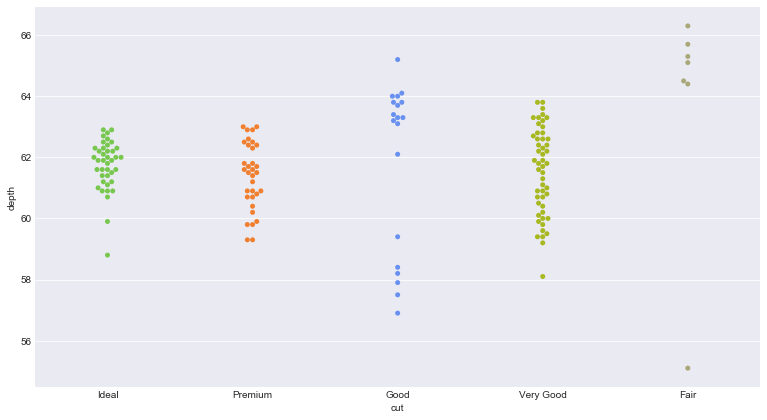

In [14]:
# plot using Swarm
plt.subplots(figsize=(13,7))
df_swarmplot = df.head(150)
sns.swarmplot(x='cut', y='depth', data=df_swarmplot, palette=colors)

Text(0.5,1,'Diamonds Quality Information')

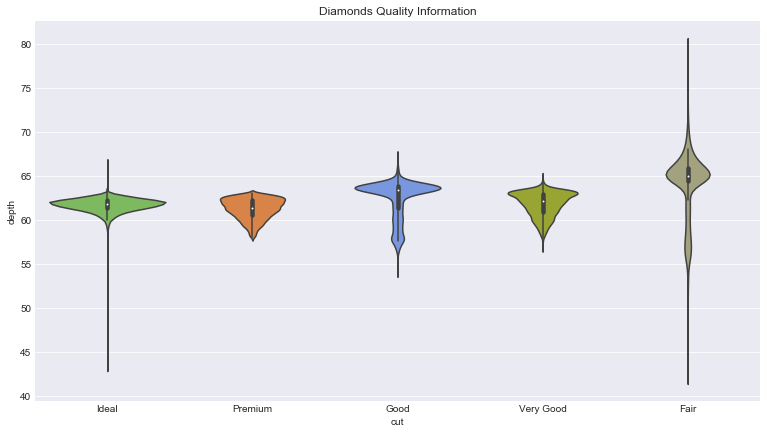

In [15]:
# Beautifay the plot 
sns.set_style('darkgrid')
plt.subplots(figsize=(13,7))
sns.violinplot(x='cut', y='depth', data=df, palette=colors)
plt.title('Diamonds Quality Information')

In [17]:
# Create a new list
melt_table = pd.melt(new_table, id_vars=['cut', 'color', 'clarity', 'depth'])
melt_table.head()

,cut,color,clarity,depth,variable,value
0,Ideal,E,SI2,61.5,carat,0.23
1,Premium,E,SI1,59.8,carat,0.21
2,Good,E,VS1,56.9,carat,0.23
3,Premium,I,VS2,62.4,carat,0.29
4,Good,J,SI2,63.3,carat,0.31


In [18]:
print(new_table.shape)
print(melt_table.shape)

(53940, 10)
(323640, 6)


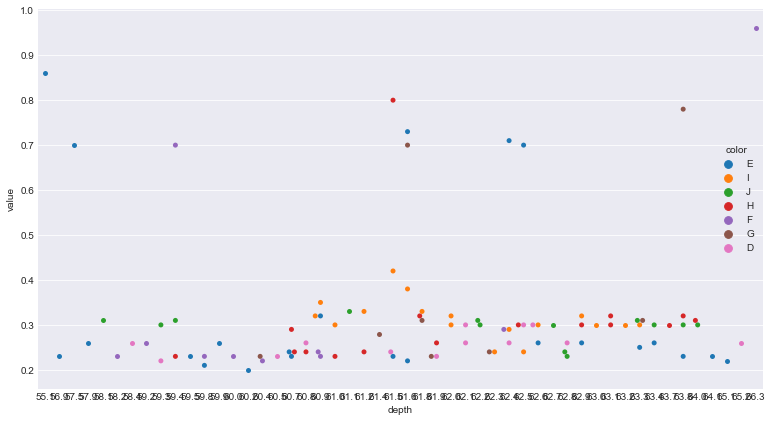

In [19]:
plt.figure(figsize=(13,7))
# Swarm plot 
df_shortened = melt_table.head(100)
sns.swarmplot(x='depth', y='value', 
             data=df_shortened,
            hue = 'color' )

In [20]:
df['depth'].min()

43.0

In [21]:
df['depth'].max()

79.0

In [22]:
def changename(x):
    if x == 'A':
        return 1
    if x == 'B':
        return 2
    if x == 'C':
        return 3
    if x == 'D':
        return 4
    if x == 'E':
        return 4
    if x == 'F':
        return 6
    if x == 'J':
        return 7
df['new_col'] = df['color'].apply(changename)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,newvalues,new_col
Number,,,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,A,4.0
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,A,4.0
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,A,4.0
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,A,NaN
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,A,7.0


In [23]:
#df[['cut','color','depth','price']]
df_ideal = df.loc[df['cut'] == 'Ideal']
df_ideal[['cut','color','depth', 'price']].head()

#df.loc(df['cut']=='Premium')

,cut,color,depth,price
Number,,,,
1,Ideal,E,61.5,326
12,Ideal,J,62.8,340
14,Ideal,J,62.2,344
17,Ideal,I,62.0,348
40,Ideal,I,61.8,403


In [24]:
df_ideal.shape

(21551, 12)

In [25]:
df_good = df.loc[df['cut'] == 'Good']
df_good.shape

(4906, 12)

In [26]:
df_100 = df_good.head(100)
df_100.shape

(100, 12)

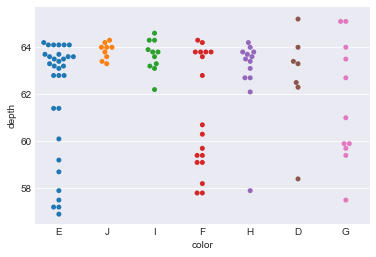

In [27]:
sns.swarmplot(x='color', y='depth', data=df_100)

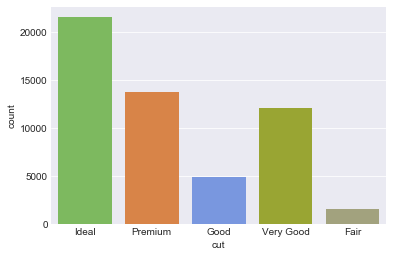

In [28]:
# Create a bar plot 
sns.countplot(x='cut',
             data = df,
             palette= colors)